In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import os
import math

In [91]:
def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            images.append(img)
    return images

def display_images(images, titles=None, top_half = False):
    # rows, cols = calculate_grid(len(images))
    rows, cols = 2, int(len(images)/2)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, (img, ax) in enumerate(zip(images, axes)):
        color = (0,0,0)
        if top_half:
            color = colo_player(img)
            img = img[0: int(img.shape[0]/2), :]
        ax.imshow(img)
        ax.set_title('color', fontsize=15, color=color)
        ax.axis('off') 

    plt.subplots_adjust(wspace=0, hspace=0) 

    plt.show()

def calculate_grid(n):
    rows = math.ceil(math.sqrt(n))
    columns = math.ceil(n / rows)
    return rows, columns

def colo_player(image):
    top_half_image = image[0: int(image.shape[0]/2), :]
    image_2d = top_half_image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(image_2d)
    labels = kmeans.labels_
    clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])
    corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
    non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
    player_cluster = 1-non_player_cluster
    arr = kmeans.cluster_centers_[player_cluster]
    arr_int = arr.astype(int)
    arr_tuple = tuple(c / 255 for c in arr_int)
    return arr_tuple

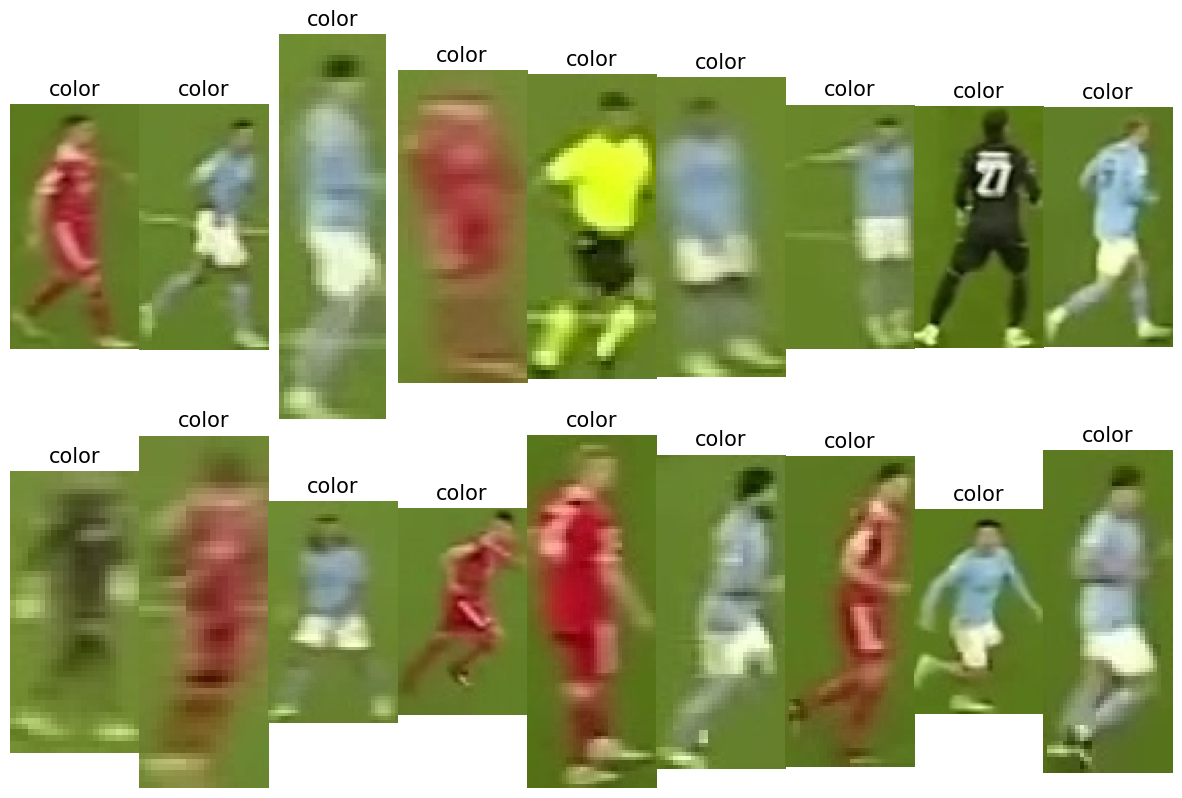

In [92]:
folder_path = '../output_videos/players/'
images = read_images_from_folder(folder_path)
display_images(images)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


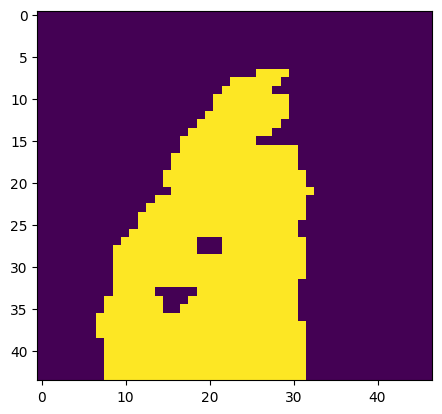

In [93]:
top_half_image = images[0][0: int(images[0].shape[0]/2), :]
image_2d = top_half_image.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)
labels = kmeans.labels_
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [94]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [95]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [96]:
arr = kmeans.cluster_centers_[player_cluster]
arr_int = arr.astype(int)
arr_tuple = tuple(arr_int)
print(arr_tuple)

(164, 97, 73)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

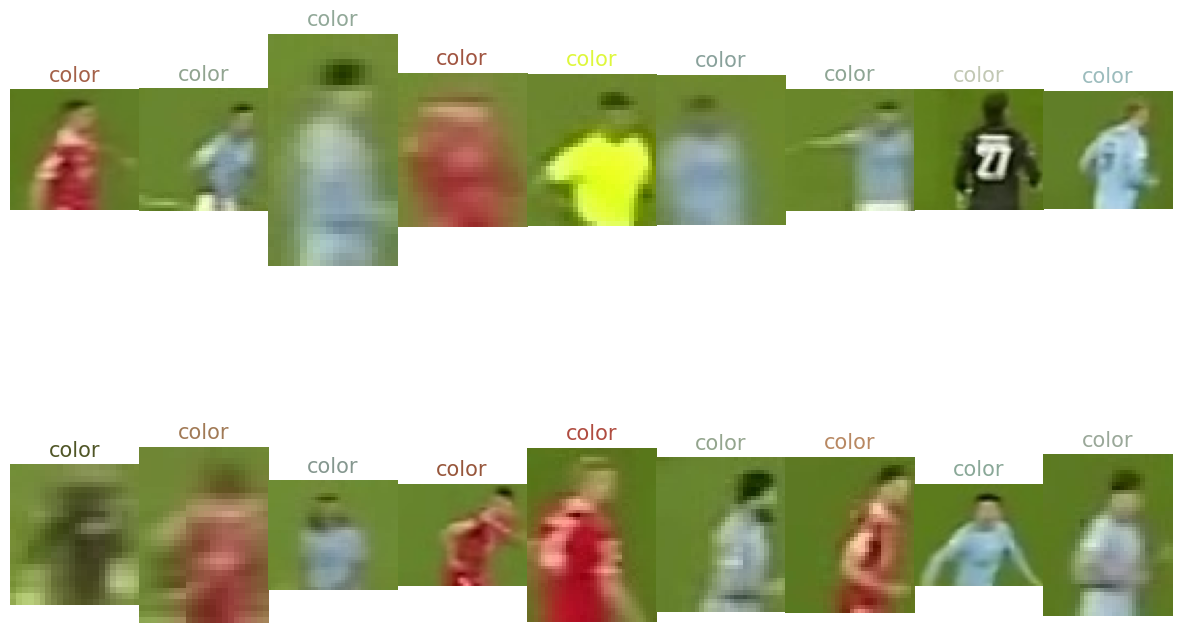

In [97]:
display_images(images, top_half= True)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

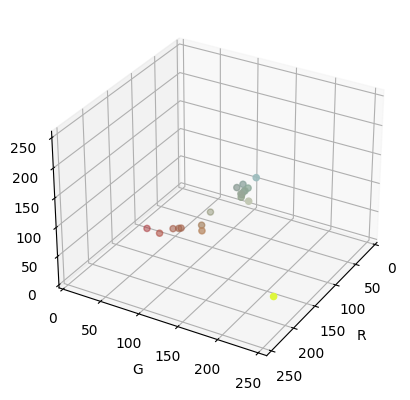

In [99]:
points = []
colors = []
for i in images:
    color = colo_player(i)
    points.append(tuple(int(c * 255) for c in color))
    colors.append(color)

x_coords = [p[0] for p in points]
y_coords = [p[1] for p in points]
z_coords = [p[2] for p in points]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords, y_coords, z_coords, c=colors, marker='o')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])

ax.view_init(elev=30, azim=30)
plt.show()
